# STD & me

Analysis of 2014 data from the CDC on the prevalence of STD's in U.S. counties. 

In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

In [125]:
df = pd.read_csv("../data/chlamydia.csv")

In [126]:
df.shape

(3228, 12)

In [127]:
df.columns

Index(['Disease', 'Area', 'State Abbreviation', 'FIPS', 'Year', 'Race', 'Sex', 'Age group', 'Transmission Category', 'Population', 'Cases', 'Rate'], dtype='object')

In [128]:
df.dtypes

Disease                  object
Area                     object
State Abbreviation       object
FIPS                      int64
Year                      int64
Race                     object
Sex                      object
Age group                object
Transmission Category    object
Population               object
Cases                    object
Rate                     object
dtype: object

In [129]:
df_test = df.convert_objects(convert_numeric=True)
df_test.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [130]:
df_test.head()

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Chlamydia,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,220,398.2
1,Chlamydia,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,667,341.1
2,Chlamydia,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,166,613.1
3,Chlamydia,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,100,444.2
4,Chlamydia,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,72,124.4


In [131]:
df['Population'] = df['Population'].str.replace(',','')
df['Cases'] = df['Cases'].str.replace(',','')

In [132]:
df = df.convert_objects(convert_numeric=True)
df.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [133]:
df.head()

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Chlamydia,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,55246,220,398.2
1,Chlamydia,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,195540,667,341.1
2,Chlamydia,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,27076,166,613.1
3,Chlamydia,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22512,100,444.2
4,Chlamydia,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,57872,72,124.4


In [134]:
df['Population'].describe()

count        3220.000000
mean        99360.995963
std        318648.364529
min            90.000000
25%         11267.750000
50%         26165.500000
75%         66834.250000
max      10017068.000000
Name: Population, dtype: float64

In [135]:
df['Population'].idxmax()

207

In [136]:
df.loc[207]

Disease                                    Chlamydia
Area                              Los Angeles County
State Abbreviation                                CA
FIPS                                            6037
Year                                            2014
Race                           All races/ethnicities
Sex                                       Both sexes
Age group                             All age groups
Transmission Category    All transmission categories
Population                               1.00171e+07
Cases                                          54881
Rate                                           547.9
Name: 207, dtype: object

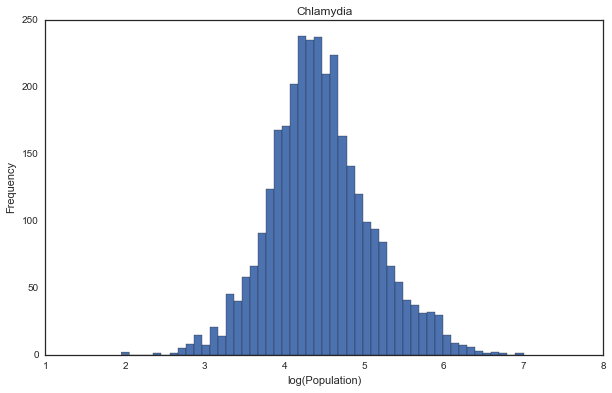

In [137]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Population'])
ax = data.plot.hist(50)
ax.set_xlabel("log(Population)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_population.png', bbox_inches='tight', dpi=150)

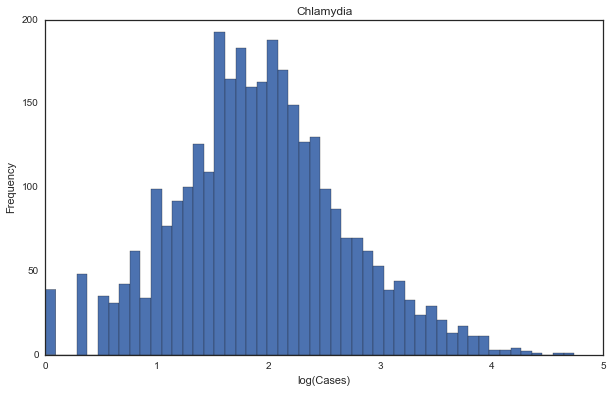

In [138]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Cases']+1)
ax = data.plot.hist(50)
ax.set_xlabel("log(Cases)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_cases.png', bbox_inches='tight', dpi=150)

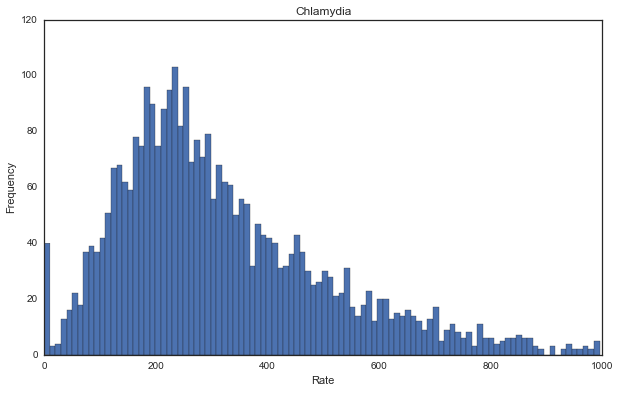

In [139]:
fig = plt.figure(figsize=(10, 6))
ax = df['Rate'].plot.hist(100)
ax.set_xlabel("Rate")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_rate.png', bbox_inches='tight', dpi=150)

In [140]:
outliers = df[df['Rate']<50]

In [141]:
outliers

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
88,Chlamydia,Prince of Wales - Outer Ketchikan,AK,2201,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,5786,0,0.0
96,Chlamydia,Wrangell-Petersburg Census Area,AK,2280,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,6174,0,0.0
256,Chlamydia,Cheyenne County,CO,8017,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,1890,0,0.0
274,Chlamydia,Hinsdale County,CO,8053,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,813,0,0.0
278,Chlamydia,Kiowa County,CO,8061,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,1423,0,0.0
322,Chlamydia,District Of Columbia,DC,11001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,646449,2,0.3
551,Chlamydia,Kalawao County,HI,15005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,90,0,0.0
565,Chlamydia,Butte County,ID,16023,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,2642,1,37.9
586,Chlamydia,Madison County,ID,16065,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,37450,15,40.1
902,Chlamydia,Cheyenne County,KS,20023,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,2694,1,37.1


People in D.C. don't have Chlamydia. Or so it seems.